In [15]:
import mlflow
import mlflow.sklearn

<b><h1>USING PYCARET

PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.

In [16]:
mlflow.set_experiment('Comparison of automl packages')
mlflow.start_run(run_name = "Pycaret")

INFO: 'Comparison of automl packages' does not exist. Creating a new experiment


<ActiveRun: >

In [1]:
#opening zip file which contains contains the csv file
import shutil
import os
fil = os.getcwd()
shutil.unpack_archive('fl_cell_big.zip',fil)

In [2]:
import pandas as pd
df = pd.read_csv('fl_cell_big.csv')
print(df)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,10/03/2017 01:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,10/03/2017 01:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,10/03/2017 01:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,10/03/2017 01:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,10/03/2017 01:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,09/09/2017 23:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,09/09/2017 23:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,09/09/2017 23:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
737451,09/09/2017 23:00,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [3]:
df_mean = df.groupby('date').mean()
df_mean = df_mean.add_suffix('_mean')
df_mean = df_mean.reset_index()

df_std = df.groupby('date').std()
df_std = df_std.add_suffix('_std')
df_std = df_std.reset_index()

df_median = df.groupby('date').median()
df_median = df_median.add_suffix('_median')
df_median = df_median.reset_index()

df_var = df.groupby('date').var()
df_var = df_var.add_suffix('_var')
df_var = df_var.reset_index()

df_min = df.groupby('date').min()
#df_min = df_min.add_suffix('_min')
#df_min = df_min.reset_index()

df_max = df.groupby('date').max()
#df_max = df_max.add_suffix('_max')
#df_max = df_max.reset_index()

df_skew = df.groupby('date').skew()
df_skew = df_skew.add_suffix('_skew')
df_skew = df_skew.reset_index()

df_sem = df.groupby('date').sem()
df_sem = df_sem.add_suffix('_sem')
df_sem = df_sem.reset_index()


df_range = df_max.sub(df_min)
df_min = df_min.add_suffix('_min')
df_max = df_max.add_suffix('_max')
df_max = df_max.reset_index()
df_min = df_min.reset_index()
df_range = df_range.add_suffix('_range')
df_range = df_range.reset_index()

In [4]:
df_summ=df_mean.merge(df_std,on='date').merge(df_median,on='date').merge(df_var,on='date').merge(df_min,on='date').merge(df_max,on='date').merge(df_skew,on='date').merge(df_sem,on='date').merge(df_range,on='date')

In [5]:
df_b=df_summ.drop(['% Silica Concentrate_std','% Silica Concentrate_var','% Silica Concentrate_max','% Silica Concentrate_min','% Silica Concentrate_skew','% Silica Concentrate_range','% Silica Concentrate_sem'],axis=1)

In [6]:
a=df_b['% Silica Concentrate_mean']
b=df_b['date']

In [7]:
print(df_b)

,date,% Iron Feed_mean,% Silica Feed_mean,Starch Flow_mean,Amina Flow_mean,Ore Pulp Flow_mean,Ore Pulp pH_mean,Ore Pulp Density_mean,Flotation Column 01 Air Flow_mean,Flotation Column 02 Air Flow_mean,...,Flotation Column 06 Air Flow_range,Flotation Column 07 Air Flow_range,Flotation Column 01 Level_range,Flotation Column 02 Level_range,Flotation Column 03 Level_range,Flotation Column 04 Level_range,Flotation Column 05 Level_range,Flotation Column 06 Level_range,Flotation Column 07 Level_range,% Iron Concentrate_range
0,01/04/2017 00:00,59.72,9.22,2337.195500,555.275083,399.960622,9.605181,1.754893,176.341925,184.851379,...,13.050,7.645,56.218,41.134,47.309,185.316,215.356,141.401,211.634,0.0
1,01/04/2017 01:00,59.72,9.22,1753.587179,575.291711,399.427594,9.825203,1.781901,176.265867,185.317813,...,11.019,9.177,51.281,32.107,61.171,168.894,196.082,153.519,201.208,0.0
2,01/04/2017 02:00,59.72,9.22,1876.279650,566.072917,399.985317,9.621750,1.769995,176.189809,185.784247,...,13.070,10.028,52.819,34.755,50.069,146.963,106.290,111.151,143.259,0.0
3,01/04/2017 03:00,59.72,9.22,1541.491998,566.954628,399.529000,9.347522,1.772134,176.113752,186.250681,...,8.883,10.321,46.022,40.410,42.859,83.722,38.089,129.096,107.534,0.0
4,01/04/2017 04:00,59.72,9.22,2375.091333,571.244950,399.854367,9.353364,1.777009,176.037694,186.717116,...,8.252,10.971,49.637,39.411,46.879,55.405,44.336,123.839,129.748,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,31/08/2017 19:00,54.59,17.81,3521.615278,584.412783,395.592028,9.287865,1.699934,299.707694,299.810561,...,43.289,147.338,56.748,64.737,55.800,97.821,42.597,167.963,103.438,0.0
4093,31/08/2017 20:00,54.59,17.81,3310.048056,511.852989,392.302738,8.925767,1.653433,299.875722,300.410556,...,46.941,174.428,52.152,80.683,71.067,178.611,55.302,145.421,87.788,0.0
4094,31/08/2017 21:00,54.59,17.81,2603.956719,624.603719,415.757697,8.912831,1.695265,299.795739,300.366417,...,46.830,181.194,54.002,70.533,58.902,196.373,53.689,288.085,150.500,0.0
4095,31/08/2017 22:00,54.59,17.81,3245.156797,570.252867,398.297064,8.963906,1.709759,299.878239,300.141811,...,42.089,166.692,63.955,82.221,53.927,152.503,37.064,198.062,97.318,0.0


In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
sc = StandardScaler()
df_b=df_b.set_index('date')
sc.fit(df_b.drop(['% Silica Concentrate_mean'],axis=1))
std = sc.transform(df_b.drop(['% Silica Concentrate_mean'],axis=1))
pca = PCA(n_components=10)
std=pca.fit_transform(std)
df_c=pd.DataFrame(std)
df_c['% Silica Concentrate_mean']=a
df_c['date']=b
df_c['lag-value']=df_c['% Silica Concentrate_mean'].shift(1)
print(df_c)

,0,1,2,3,4,5,6,7,8,9,% Silica Concentrate_mean,date,lag-value
0,14.269094,-2.090736,-4.092728,0.117653,2.263381,0.095275,-0.233675,-0.533870,-0.502542,1.831638,3.11,01/04/2017 00:00,NaN
1,13.855271,-2.366516,-4.245890,-0.027465,2.545875,-0.535151,-0.817639,-1.510596,-1.958152,1.182114,3.11,01/04/2017 01:00,3.11
2,14.074032,-3.506050,-3.990056,0.209456,2.562958,0.028074,-1.347406,-1.174615,-0.357380,1.350283,3.11,01/04/2017 02:00,3.11
3,13.975241,-3.957880,-4.073968,0.443149,2.662216,0.901516,-1.528206,-1.526411,0.047119,1.254195,3.11,01/04/2017 03:00,3.11
4,14.292406,-4.052588,-3.834100,0.632531,2.227379,0.740077,-0.508356,-0.995980,0.604280,1.968515,3.11,01/04/2017 04:00,3.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,-2.992538,-0.611119,-1.837572,6.980140,-0.785244,1.701882,-4.659714,-7.224659,4.716339,1.623805,2.54,31/08/2017 19:00,2.14
4093,-2.738600,0.467685,-1.227436,7.665775,-0.299088,3.474828,-5.217967,-7.627748,5.564911,1.040192,2.57,31/08/2017 20:00,2.54
4094,-2.446888,-1.178480,-1.756849,7.451808,0.626055,3.122830,-2.742303,-6.743562,5.006169,1.726571,3.53,31/08/2017 21:00,2.57
4095,-3.349487,-0.139566,-2.188627,6.905487,0.098460,2.890302,-6.110013,-7.427368,3.762330,1.479336,4.12,31/08/2017 22:00,3.53


In [9]:
df_c = df_c.dropna()

In [77]:
import numpy as np
from sklearn.model_selection import train_test_split
train,test = train_test_split(df_c, test_size=0.33, random_state=42)
train.to_csv('train.csv')
test.to_csv('test.csv')

1)First install pycaret then import the library of pycaret required for regression analysis.

In [11]:
#!pip install pycaret
from pycaret.regression import *

2)Then use setup to initialize the features. I gave feature_interaction, feature_ratio and polynomial_features as true over here.

In [12]:
reg1 = setup(data = train.drop('date',axis=1), target = '% Silica Concentrate_mean',polynomial_features = True,feature_interaction = True, feature_ratio = True)

,Description,Value
0,session_id,8060
1,Target,% Silica Concentrate_mean
2,Original Data,"(2744, 12)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1920, 27)"


3)Then check which model is giving the best performance.

In [13]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3991,0.3020,0.5482,0.7633,0.1575,0.1875,0.3370
gbr,Gradient Boosting Regressor,0.4043,0.3095,0.5549,0.7576,0.1593,0.1912,0.5290
et,Extra Trees Regressor,0.4003,0.3178,0.5622,0.7514,0.1611,0.1907,0.5990
rf,Random Forest Regressor,0.4042,0.3178,0.5626,0.7508,0.1609,0.1915,1.0450
xgboost,Extreme Gradient Boosting,0.4241,0.3382,0.5806,0.7346,0.1675,0.1992,0.9200
knn,K Neighbors Regressor,0.4552,0.3982,0.6293,0.6894,0.1815,0.2131,0.0180
ada,AdaBoost Regressor,0.5421,0.4264,0.6521,0.6655,0.2046,0.3039,0.2060
br,Bayesian Ridge,0.4485,0.4686,0.6560,0.6345,0.1724,0.2146,0.0110
omp,Orthogonal Matching Pursuit,0.4884,0.4823,0.6905,0.6244,0.1934,0.2344,0.0100
ridge,Ridge Regression,0.4522,0.5277,0.6782,0.5883,0.1740,0.2158,0.0120


4)Create the model.

In [14]:
lgbm=create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3774,0.2443,0.4943,0.7867,0.1486,0.1836
1,0.4158,0.3425,0.5852,0.7134,0.1629,0.1915
2,0.4016,0.2949,0.5430,0.7789,0.1563,0.1845
3,0.3986,0.3197,0.5655,0.7498,0.1674,0.1969
4,0.4349,0.3613,0.6011,0.7245,0.1758,0.1962
5,0.4238,0.3279,0.5727,0.7742,0.1635,0.2006
6,0.4114,0.3418,0.5847,0.7163,0.1669,0.1948
7,0.4017,0.2911,0.5396,0.7763,0.1486,0.1856
8,0.3528,0.2587,0.5086,0.7983,0.1427,0.1653
9,0.3726,0.2379,0.4878,0.8143,0.1426,0.1760


In [35]:
lab = pd.DataFrame(predict_model(lgbm))['Label']
correct = pd.DataFrame(predict_model(lgbm))['% Silica Concentrate_mean']
corr_matrix = np.corrcoef(correct, lab)
corr=corr_matrix[0,1]
r_sq_train=corr**2
print(r_sq_train)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3680,0.2600,0.5099,0.7795,0.1515,0.1839


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3680,0.2600,0.5099,0.7795,0.1515,0.1839


0.7812389105516901

In [17]:
mlflow.sklearn.log_model(lgbm,"lgbm_using_pycaret")

In [36]:
predictions = predict_model(lgbm, data=test.drop(['date'],axis=1))

In [37]:
predictions['date']=test['date']
predictions=predictions.set_index('date')
predictions=predictions.sort_index()

In [46]:
import plotly.graph_objects as go
plot_col=["% Silica Concentrate_mean","Label"]
pd.options.plotting.backend = "plotly"
fig = predictions[plot_col].dropna().sort_index().plot()
fig.write_html("lgbm.html")

5)The r^2 value for the test data.

In [39]:
corr_matrix = np.corrcoef(predictions["% Silica Concentrate_mean"], predictions["Label"])
corr=corr_matrix[0,1]
r_sq_test=corr**2
pint(r_sq_test)

0.7425826900315677

In [41]:
mlflow.log_metrics({'rsq_train':r_sq_train, 'rsq_test':r_sq_test})

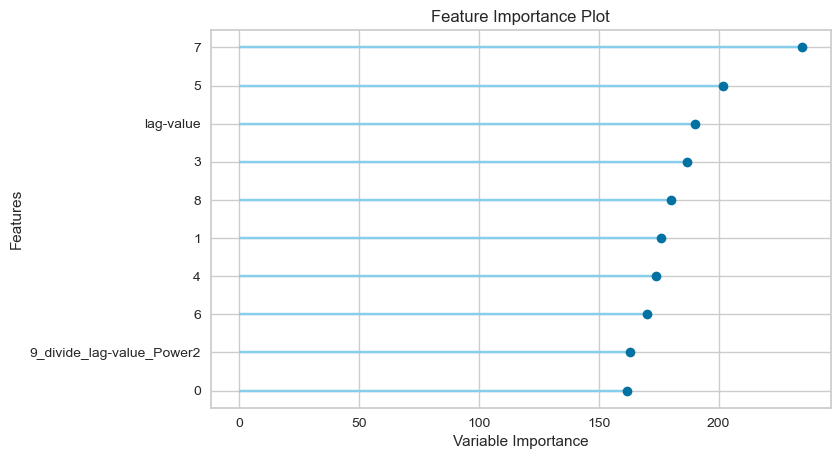

<Figure size 576x396 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt
fig = plot_model(lgbm,plot="feature")
plt.savefig("feature.jpg",show=True)

In [43]:
#!pip install shap

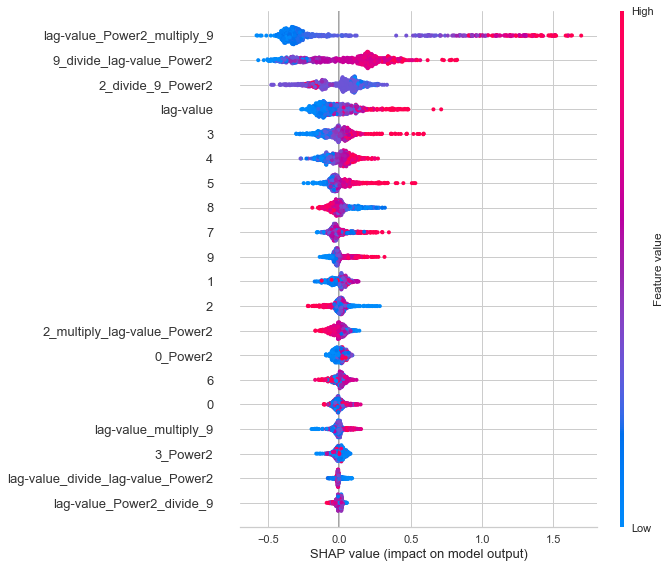

In [44]:
import matplotlib.pyplot as plt
fig = interpret_model(lgbm)

In [48]:
mlflow.log_artifact("lgbm.html")
mlflow.log_artifact("feature.jpg")

In [49]:
mlflow.end_run()

In [101]:
import os
model_paths = os.getcwd()
save_model(lgbm, model_paths+'Final_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='% Silica Concentrate_mean',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
           

In [23]:
#!pip install bentoml

7)Deploy the model using bentoml, the steps to which are mentioned in this document 

In [29]:
%%writefile flotation_cell.py
import pandas as pd
import bentoml
from bentoml.frameworks.sklearn import SklearnModelArtifact
from bentoml.service.artifacts.common import PickleArtifact
from bentoml.handlers import DataframeHandler
from bentoml.adapters import DataframeInput

@bentoml.artifacts([PickleArtifact('model')])
@bentoml.env(pip_packages=["scikit-learn", "pandas"])
class flotation_cell(bentoml.BentoService):

    @bentoml.api(input=DataframeInput(), batch=True)
    def predict(self, df):
        """
        predict expects pandas.Series as input
        """        
#         series = df.iloc[0,:]
        return self.artifacts.model.predict(df)

Writing flotation_cell.py


In [30]:
# 1) import the custom BentoService defined above
from flotation_cell import flotation_cell

# 2) `pack` it with required artifacts
bento_service = flotation_cell()
model =  load_model(model_paths+'Final_model')

bento_service.pack('model', model)

# 3) save your BentoSerivce to file archive
saved_path = bento_service.save()

[2021-06-23 10:43:34,627] WARNING - pip package requirement `bentoml==0.13.0` not found in current python environment
[2021-06-23 10:43:34,636] WARNING - pip package requirement pandas already exist
Transformation Pipeline and Model Successfully Loaded
[2021-06-23 10:43:47,717] INFO - BentoService bundle 'flotation_cell:20210623104343_0B7D98' saved to: C:\Users\nidhi\bentoml\repository\flotation_cell\20210623104343_0B7D98


In [32]:
#!bentoml serve flotation_cell:latest --run-with-ngrok

^C


<b><h1>USING TPOT

The Tree-Based Pipeline Optimization Tool (TPOT) was one of the very first AutoML methods and open-source software packages developed for the data science community. TPOT was developed by Dr. Randal Olson while a postdoctoral student with Dr. Jason H. Moore at the Computational Genetics Laboratory of the University of Pennsylvania and is still being extended and supported by this team.

The goal of TPOT is to automate the building of ML pipelines by combining a flexible expression tree representation of pipelines with stochastic search algorithms such as genetic programming. TPOT makes use of the Python-based scikit-learn library as its ML menu.


1)First we need to install tpot, which require an internet connection

In [35]:
#!pip install tpot

  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11955 sha256=bc955cba23b1cb66d5cb57feb34f412a7f904cd9f9fe5cc77dd86b268f429010
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\a8\bb\8f\6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit


In [57]:
mlflow.start_run(run_name = "tpot")

<ActiveRun: >

2)Then do the following steps, it doesn’t require any internet connection, please note that this process takes a lot of time.

In [36]:
from tpot import TPOTRegressor
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, random_state=1)
tpot = TPOTRegressor(generations=5,population_size=5,scoring='r2',cv=cv,verbosity=2,random_state=1,n_jobs=-1)
tpot.fit(train.drop(["% Silica Concentrate_mean","date"],axis=1),train['% Silica Concentrate_mean'])

Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7245130449863514

Generation 2 - Current best internal CV score: 0.7600362997567036

Generation 3 - Current best internal CV score: 0.7600362997567036

Generation 4 - Current best internal CV score: 0.7648540259232951

Generation 5 - Current best internal CV score: 0.7648540259232951

Best pipeline: ElasticNetCV(GradientBoostingRegressor(input_matrix, alpha=0.75, learning_rate=0.1, loss=quantile, max_depth=9, max_features=0.35000000000000003, min_samples_leaf=10, min_samples_split=11, n_estimators=100, subsample=0.8500000000000001), l1_ratio=1.0, tol=0.01)


TPOTRegressor(config_dict=None, crossover_rate=0.1,
              cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=1),
              disable_update_check=False, early_stop=None, generations=5,
              log_file=None, max_eval_time_mins=5, max_time_mins=None,
              memory=None, mutation_rate=0.9, n_jobs=-1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=5,
              random_state=1, scoring='r2', subsample=1.0, template=None,
              use_dask=False, verbosity=2, warm_start=False)

3)Then export the best pipeline code into a python file, no internet connection required.

In [ ]:
tpot.export('tpot_flotation_best_model.py')

In [50]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.75, learning_rate=0.1, loss="quantile", max_depth=9, max_features=0.35000000000000003, min_samples_leaf=10, min_samples_split=11, n_estimators=100, subsample=0.8500000000000001)),
    ElasticNetCV(l1_ratio=1.0, tol=0.01)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 1)


model=exported_pipeline.fit(train.drop(["% Silica Concentrate_mean","date"],axis=1),train['% Silica Concentrate_mean'])

In [56]:
from sklearn.model_selection import cross_val_score
rsq_train = cross_val_score(exported_pipeline,train.drop(["% Silica Concentrate_mean","date"],axis=1),train['% Silica Concentrate_mean'],scoring='r2').mean()

4)r^2 value can be found out using the following command

In [60]:
tpot.score(test.drop(["% Silica Concentrate_mean","date"],axis=1),test['% Silica Concentrate_mean'])

0.7555660216964302

In [61]:
mlflow.log_metrics({'rsq_train':0.7645, 'rsq_test':tpot.score(test.drop(["% Silica Concentrate_mean","date"],axis=1),test['% Silica Concentrate_mean'])})

In [65]:
predict = model.predict(test.drop(["% Silica Concentrate_mean","date"],axis=1))

In [69]:
import plotly.graph_objects as go
predictions=test
predictions['predict']=predict
predictions=predictions.set_index('date')
predictions=predictions.sort_index()
plot_col=["% Silica Concentrate_mean","predict"]
pd.options.plotting.backend = "plotly"
fig = predictions[plot_col].dropna().sort_index().plot()
fig.write_html("gbr.html")

In [70]:
mlflow.sklearn.log_model(model,"gbr_using_tpot")

In [71]:
mlflow.log_artifact("gbr.html")
mlflow.log_artifact("tpot_flotation_best_model.py")

In [72]:
mlflow.end_run()

5)Now we can use bentoml to save the model as a REST API

In [ ]:
%%writefile flotation_cell.py
import pandas as pd
import bentoml
from bentoml.frameworks.sklearn import SklearnModelArtifact
from bentoml.service.artifacts.common import PickleArtifact
from bentoml.handlers import DataframeHandler
from bentoml.adapters import DataframeInput

@bentoml.artifacts([PickleArtifact('model')])
@bentoml.env(pip_packages=["scikit-learn", "pandas"])
class flotation_cell(bentoml.BentoService):

    @bentoml.api(input=DataframeInput(), batch=True)
    def predict(self, df):
        """
        predict expects pandas.Series as input
        """        
#         series = df.iloc[0,:]
        return self.artifacts.model.predict(df)

In [ ]:
from flotation_cell import flotation_cell

# 2) `pack` it with required artifacts
bento_service = flotation_cell()
model =  load_model(model_paths+'Final_model')

bento_service.pack('model', model)

# 3) save your BentoSerivce to file archive
saved_path = bento_service.save()

In [ ]:
#!bentoml serve flotation_cell:latest --run-with-ngrok

<h1><b>USING H2O

H2O is a Java-based software for data modeling and general computing. 

In [73]:
mlflow.start_run(run_name="h2o")

<ActiveRun: >

1)Install h2o, this requires an internet connection

In [74]:
#conda install -c conda-forge h2o-py openjdk -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Hp\anaconda3

  added / updated specs:
    - h2o-py
    - openjdk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa244fe_0         3.1 MB  conda-forge
    h2o-py-3.32.1.4            |     pyhd8ed1ab_0       158.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:       161.1 MB

The following packages will be UPDATED:

  h2o-py                              3.32.1.3-pyhd8ed1ab_0 --> 3.32.1.4-pyhd8ed1ab_0

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.10.3-py38haa95532_0 --> conda-forge::conda-4.10.3-py38haa244fe_0




conda-4.10.3         | 3.1 MB    |            |   0% 
conda-4.10.3         | 3.1 MB    |         

2)Import h2o and connect it to a local server, no internet required.

In [75]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Zulu11.43+55-CA (build 11.0.9.1+1-LTS, mixed mode)
  Starting server from C:\Users\Hp\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Hp\AppData\Local\Temp\tmp1tw28kch
  JVM stdout: C:\Users\Hp\AppData\Local\Temp\tmp1tw28kch\h2o_Hp_started_from_python.out
  JVM stderr: C:\Users\Hp\AppData\Local\Temp\tmp1tw28kch\h2o_Hp_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Asia/Muscat
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_Hp_9tydxt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.480 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


3)When we click on that link we will go to the h2o flow page, no internet required.

In [78]:
train.drop("date",axis=1).to_csv("train.csv",index=False)
test.drop("date",axis=1).to_csv("test.csv",index=False)

4)Now import the train and test data into h2o cluster, by first converting them into csv files, no internet required.

In [116]:
train1 = h2o.import_file("train.csv",header=1)
test1 = h2o.import_file("test.csv",header=1)
print(train1)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


C1,0,1,2,3,4,5,6,7,8,9,% Silica Concentrate_mean,date,lag-value
1877,5.19646,-1.39476,-3.28205,-0.806812,2.413,-1.16902,-1.96253,-1.40066,0.619011,-0.410696,4.4,14/03/2017 06:00,4.69
522,5.40734,-6.81923,12.2911,-1.29193,-5.92257,2.86506,2.47634,-1.44422,-2.14075,3.92288,1.34,04/07/2017 18:00,1.34
523,5.93573,-6.72432,11.7852,-0.855797,-6.49242,3.33362,2.09338,-1.57041,-1.74183,3.56945,1.34,04/07/2017 19:00,1.34
3249,-4.72844,-4.6678,-2.30608,2.87313,-1.84466,-3.00194,2.42128,3.46195,-3.17809,-1.82741,1.34,25/04/2017 04:00,1.04
2355,-2.82136,7.32134,2.75763,-2.19281,-4.00463,-2.98532,-2.4148,-0.147459,-3.40518,1.20255,1.41,17/06/2017 22:00,1.66
3098,4.05092,-4.25524,-0.484325,-1.00543,0.0220537,-2.2029,-5.30964,-1.85307,0.679618,-3.57058,1.25,23/07/2017 21:00,1.6
2650,5.56035,3.51044,-3.35384,0.483907,0.163969,-1.05186,1.84812,0.7746,2.34696,-0.600628,3.49,20/04/2017 05:00,3.57
351,2.00462,2.2489,4.55274,-3.71444,-0.562449,3.18341,3.15234,-1.30407,0.313886,-0.266735,1.66,03/06/2017 15:00,1.59
3526,-3.69062,0.543525,1.34227,-5.71301,1.45199,0.137243,-2.80431,-1.01182,1.10281,-2.38316,1.15,27/05/2017 17:00,1.14
1949,-4.03445,-0.487538,-1.0624,-3.51644,2.88399,-0.566404,1.52907,-1.77065,2.14332,-0.464634,3.32,14/06/2017 06:00,3.33


In [80]:
x = train1.columns
y = "% Silica Concentrate_mean"
x.remove(y)

5)Then use automl to find out the best model, no internet required.

In [81]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame=train1)

AutoML progress: |
23:07:20.430: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [102]:
print(aml.leader)

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20210718_230720

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.11045582942116158
RMSE: 0.3323489573041588
MAE: 0.24479292844720327
RMSLE: 0.09815835327130838
R^2: 0.9118408452473934
Mean Residual Deviance: 0.11045582942116158
Null degrees of freedom: 2743
Residual degrees of freedom: 2737
Null deviance: 3437.9957110773908
Residual deviance: 303.0907959316674
AIC: 1757.7196855255131

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.26464765094868503
RMSE: 0.5144391615620695
MAE: 0.37280920754161184
RMSLE: 0.14811485720233739
R^2: 0.7887742698853977
Mean Residual Deviance: 0.26464765094868503
Null degrees of freedom: 2743
Residual degrees of freedom: 2737
Null deviance: 3439.4093296591977
Residual deviance: 726.1931542031917
AIC: 4155.381924808584



In [83]:
import mlflow.h2o
mlflow.h2o.log_model(aml.leader,'stackendsemble_using_h2o')

6)Then predict the values for test data, no internet required.

In [84]:
predict = aml.leader.predict(test1.drop("% Silica Concentrate_mean"))

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [85]:
predict =predict.as_data_frame()

In [86]:
result = predict["predict"].tolist()

In [87]:
test['predict'] = result

In [88]:
corr_matrix = np.corrcoef(test["% Silica Concentrate_mean"], test["predict"])
corr=corr_matrix[0,1]
r_sq=corr**2
print(r_sq)

0.7746645275643084

In [95]:
import plotly.graph_objects as go
predictions=test
predictions['predict']=predict
predictions=predictions.set_index('date')
predictions=predictions.sort_index()
plot_col=["% Silica Concentrate_mean","predict"]
pd.options.plotting.backend = "plotly"
fig = predictions[plot_col].dropna().sort_index().plot()
fig.write_html("se.html")

In [96]:
rsq_train = aml.leader.r2()

In [97]:
mlflow.log_metrics({'rsq_train':rsq_train, 'rsq_test':r_sq})

6)An example of how to get the visualisation of a model using h2o

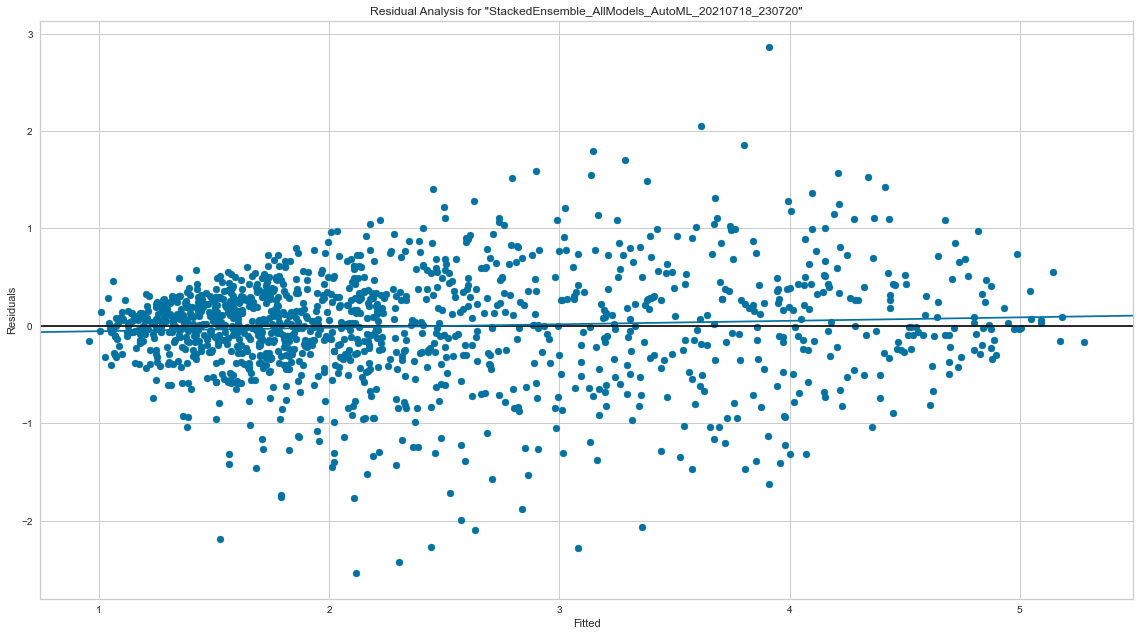

In [117]:
import matplotlib.pyplot as plt
pd_plot = aml.leader.residual_analysis_plot(test1)
plt.savefig("residual.jpeg")
mlflow.log_artifact('residual.jpeg')

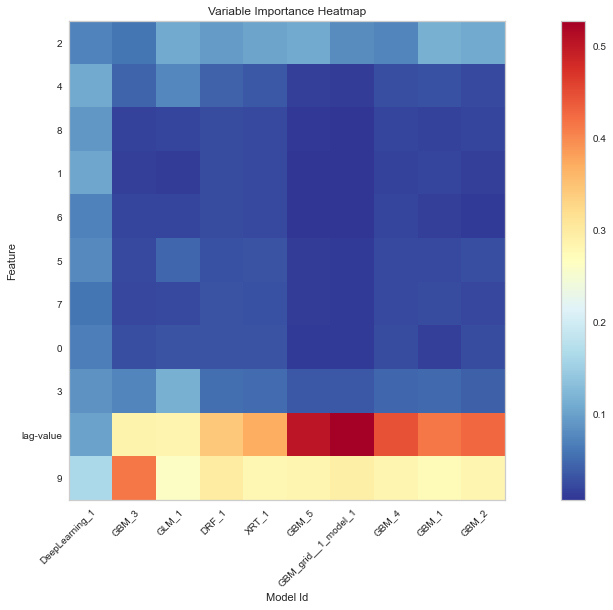

In [119]:
import matplotlib.pyplot as plt
pd_plot = aml.varimp_heatmap()
plt.savefig("heat_map.jpeg")
mlflow.log_artifact('heat_map.jpeg')

gbm Model Build progress: |███████████████████████████████████████████████| 100%


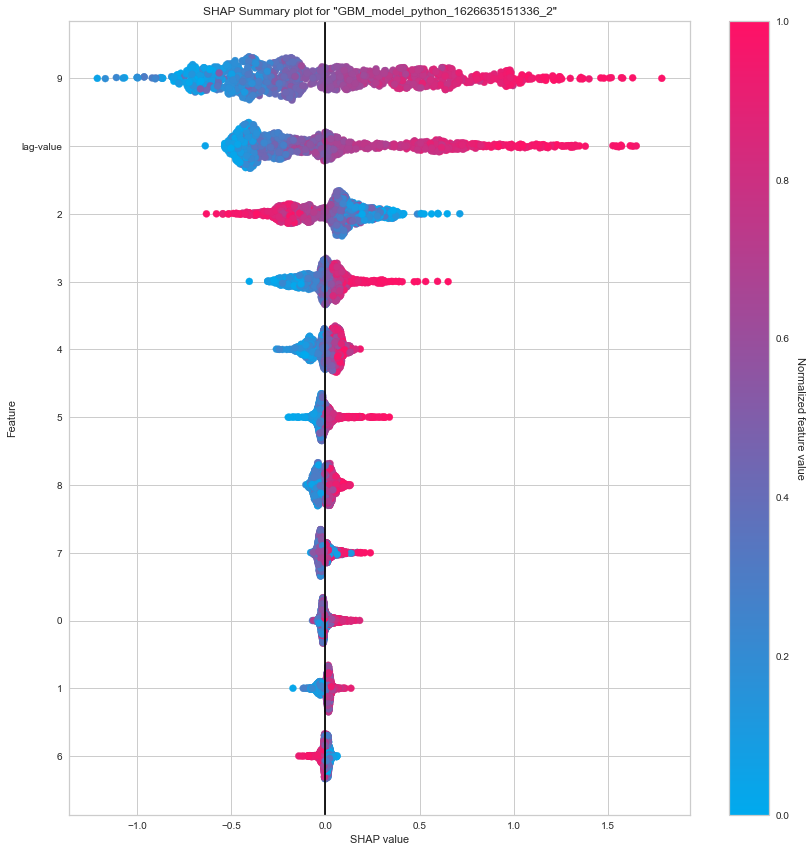

In [130]:
import matplotlib.pyplot as plt
from h2o.estimators import H2OGradientBoostingEstimator
model = H2OGradientBoostingEstimator()
model.train(x=x, y=y, training_frame=train1)
pd_plot = model.shap_summary_plot(test1)
plt.savefig("feature_interaction.jpeg")
mlflow.log_artifact('feature_interaction.jpeg')

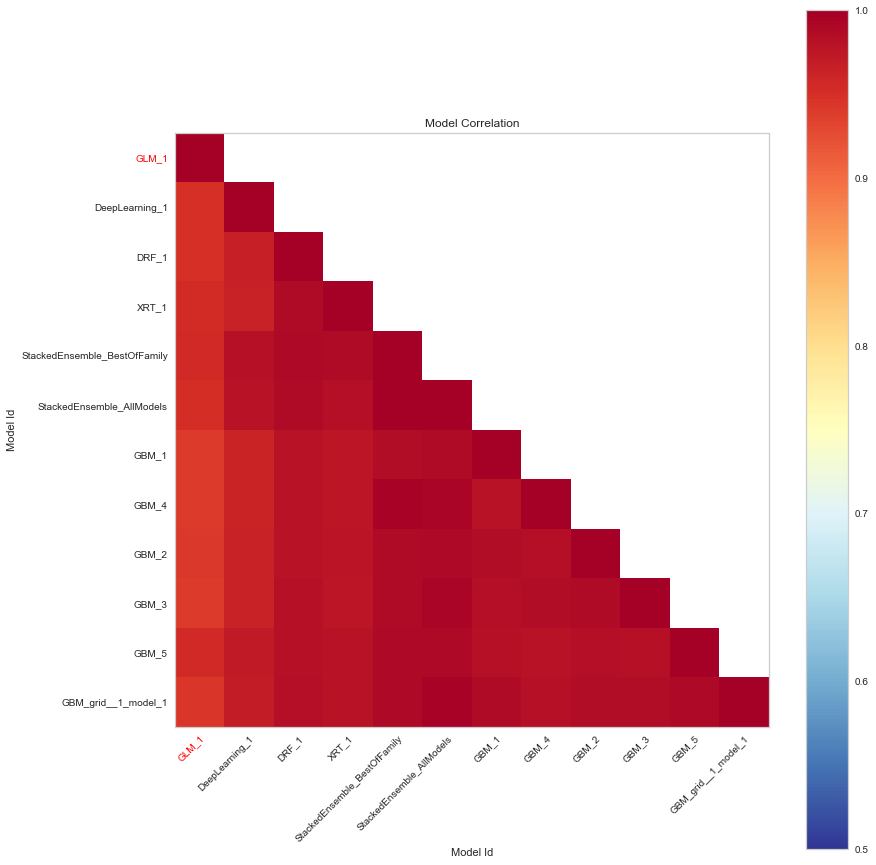

In [131]:
import matplotlib.pyplot as plt
pd_plot = aml.model_correlation_heatmap(test1)
plt.savefig("model_correlation.jpeg")
mlflow.log_artifact('model_correlation.jpeg')

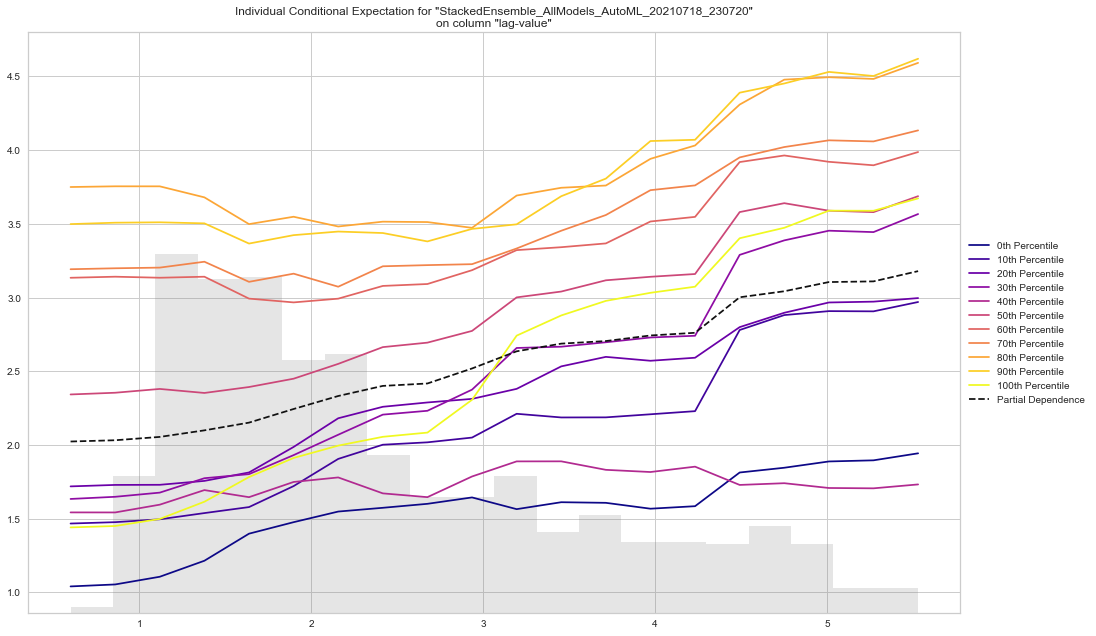

In [99]:
import matplotlib.pyplot as plt
pd_plot = aml.leader.ice_plot(test1,"lag-value")
plt.savefig("individual_conditional_expectation_plot.jpeg")

In [89]:
mlflow.log_artifact("individual_conditional_expectation_plot.jpeg")

7)We can get the whole explanation of how the different models work on our data using the below command

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_AutoML_20210718_230720,0.264648,0.514439,0.264648,0.372809,0.148115,262,0.038684,StackedEnsemble
StackedEnsemble_BestOfFamily_AutoML_20210718_230720,0.266674,0.516405,0.266674,0.373302,0.148919,290,0.020599,StackedEnsemble
GBM_4_AutoML_20210718_230720,0.275732,0.525102,0.275732,0.380108,0.152112,335,0.010768,GBM
GBM_grid__1_AutoML_20210718_230720_model_1,0.276467,0.525801,0.276467,0.380828,0.151354,272,0.016156,GBM
GBM_3_AutoML_20210718_230720,0.277075,0.52638,0.277075,0.381956,0.151556,335,0.014232,GBM
GBM_2_AutoML_20210718_230720,0.279938,0.529092,0.279938,0.381893,0.152814,303,0.006163,GBM
GBM_1_AutoML_20210718_230720,0.286902,0.535632,0.286902,0.388931,0.15456,351,0.005786,GBM
GBM_5_AutoML_20210718_230720,0.292505,0.540837,0.292505,0.395263,0.155567,356,0.006366,GBM
XRT_1_AutoML_20210718_230720,0.296552,0.544566,0.296552,0.395995,0.157531,1231,0.007545,DRF
DRF_1_AutoML_20210718_230720,0.297084,0.545055,0.297084,0.39691,0.157671,1524,0.007614,DRF


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

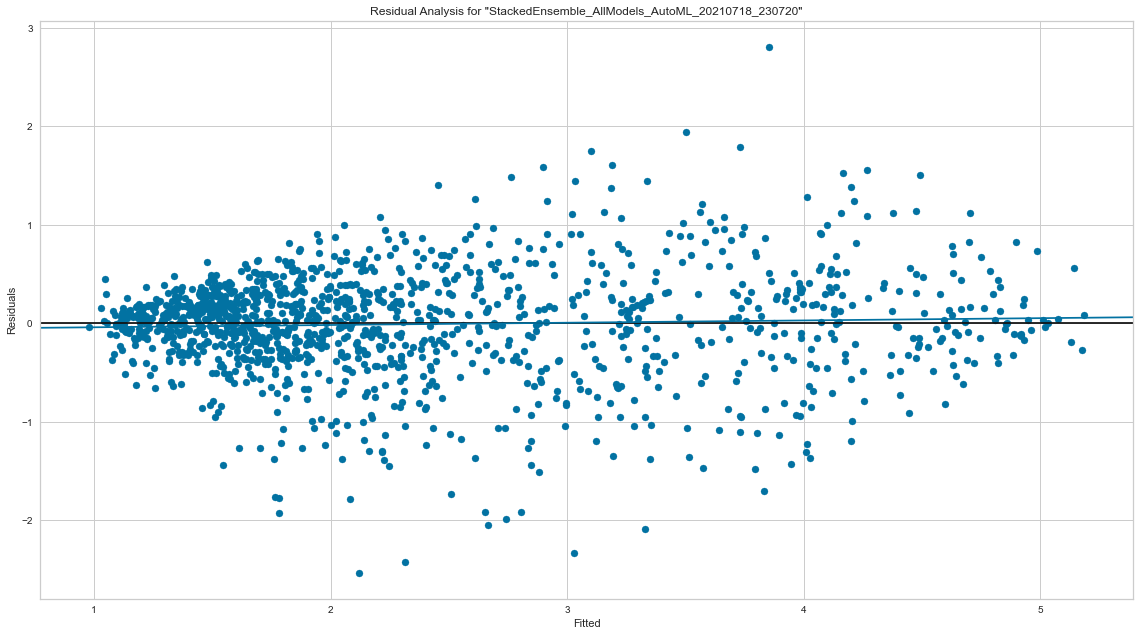

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

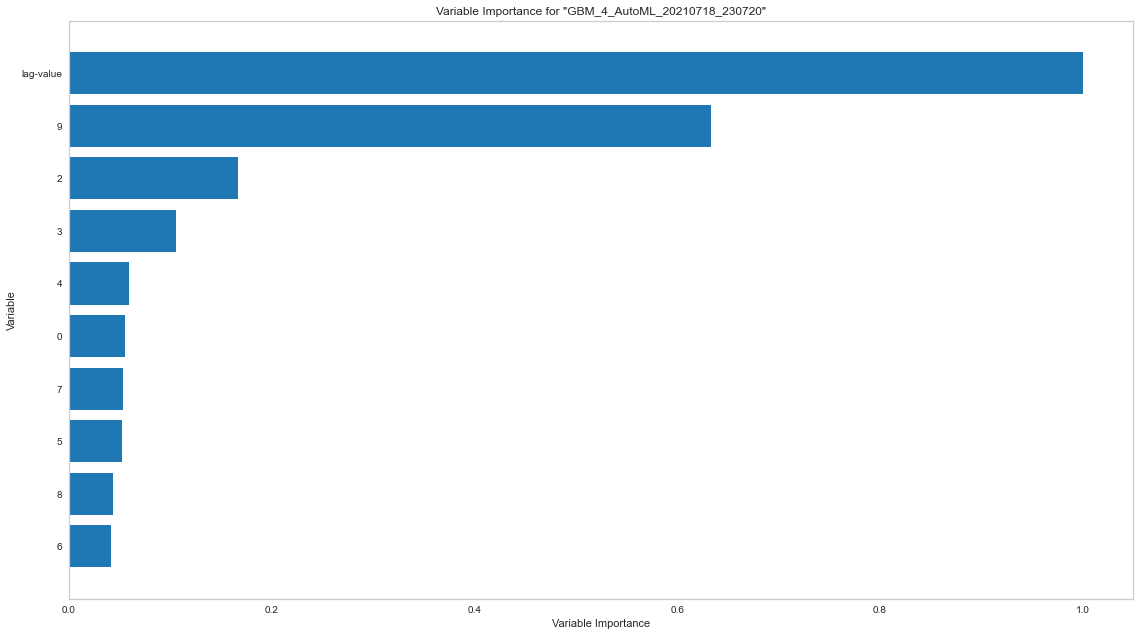

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

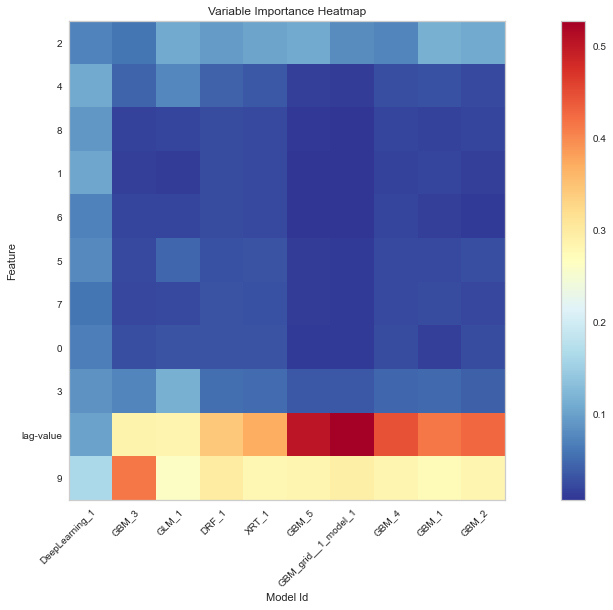

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

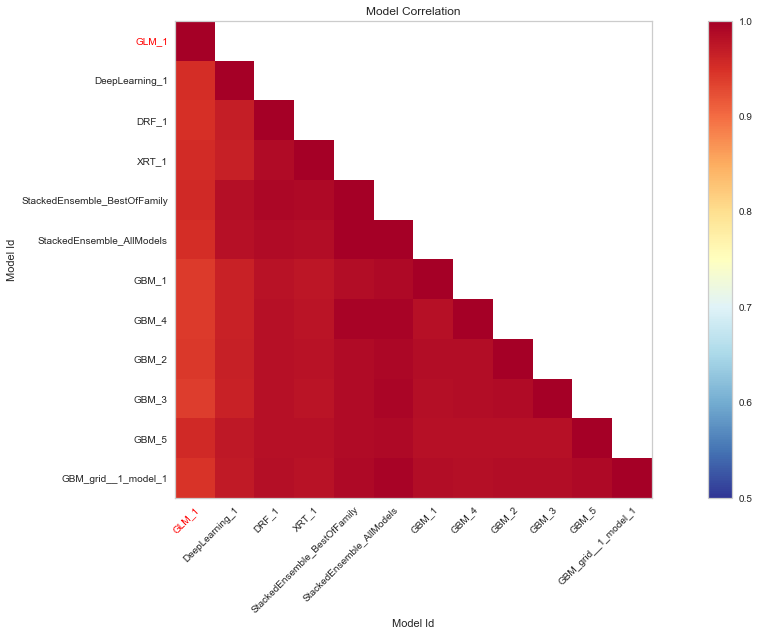

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

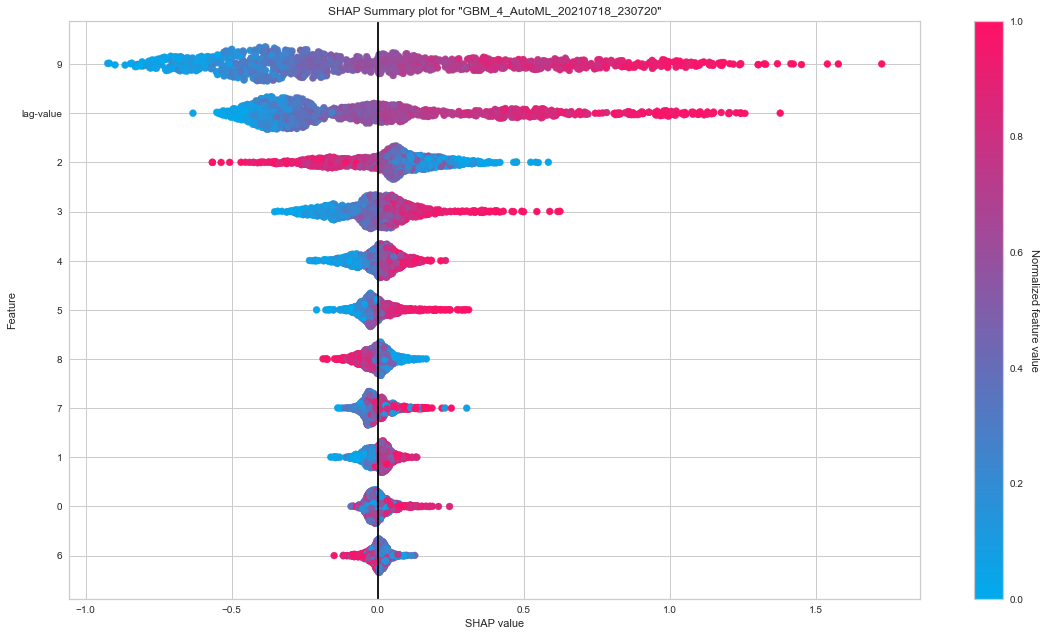

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

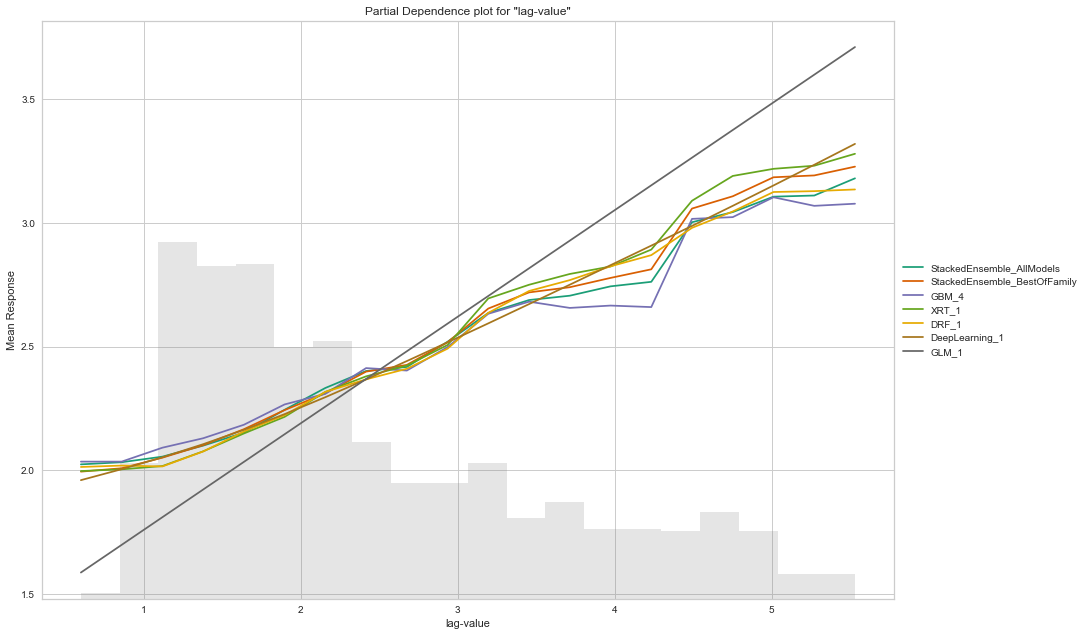

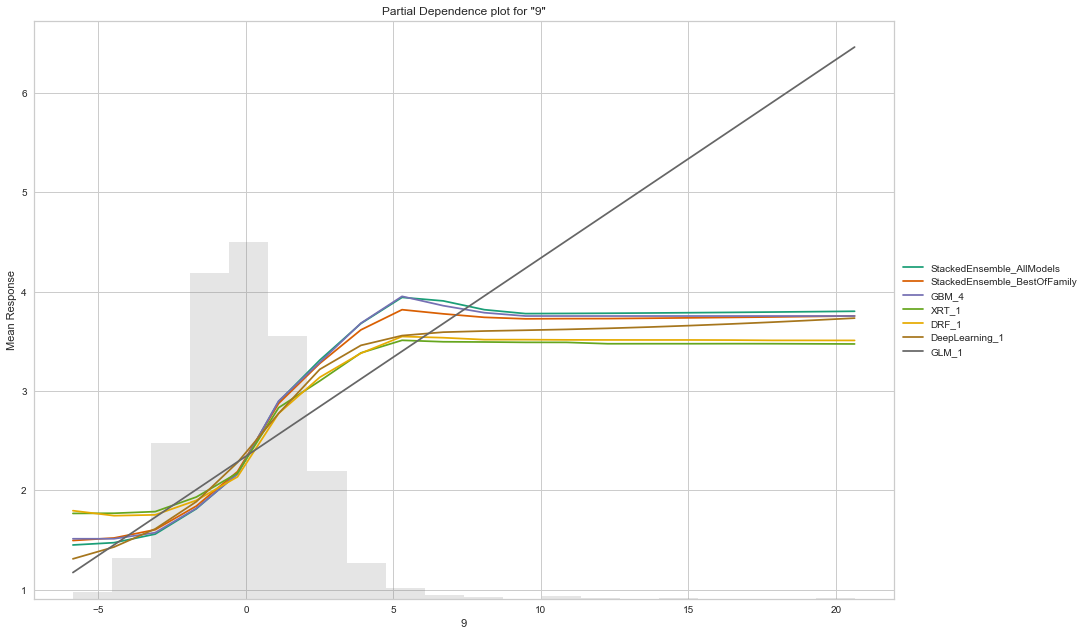

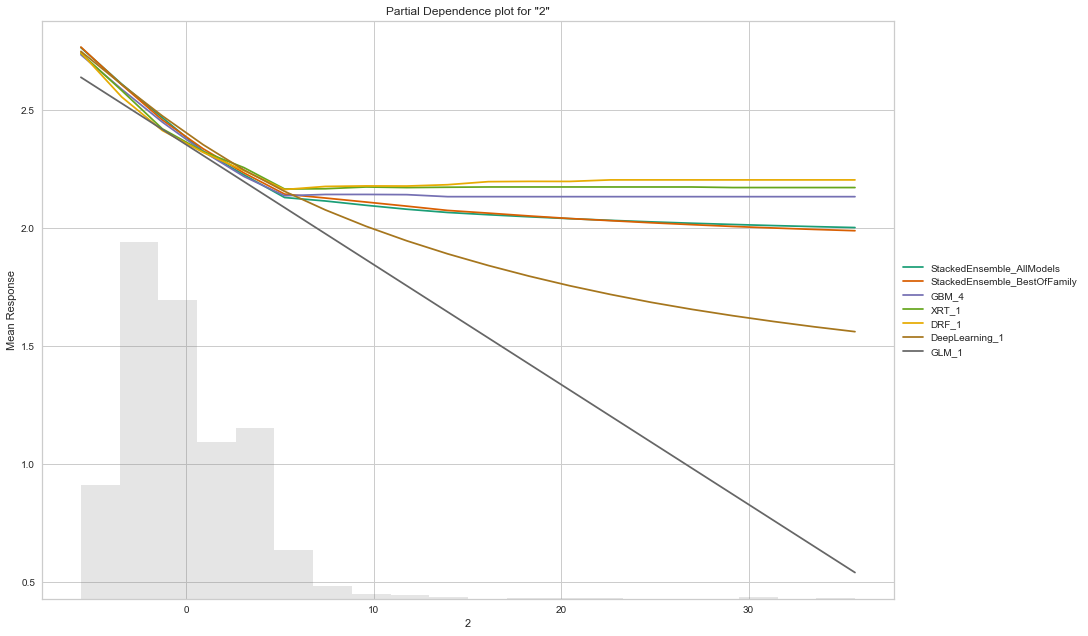

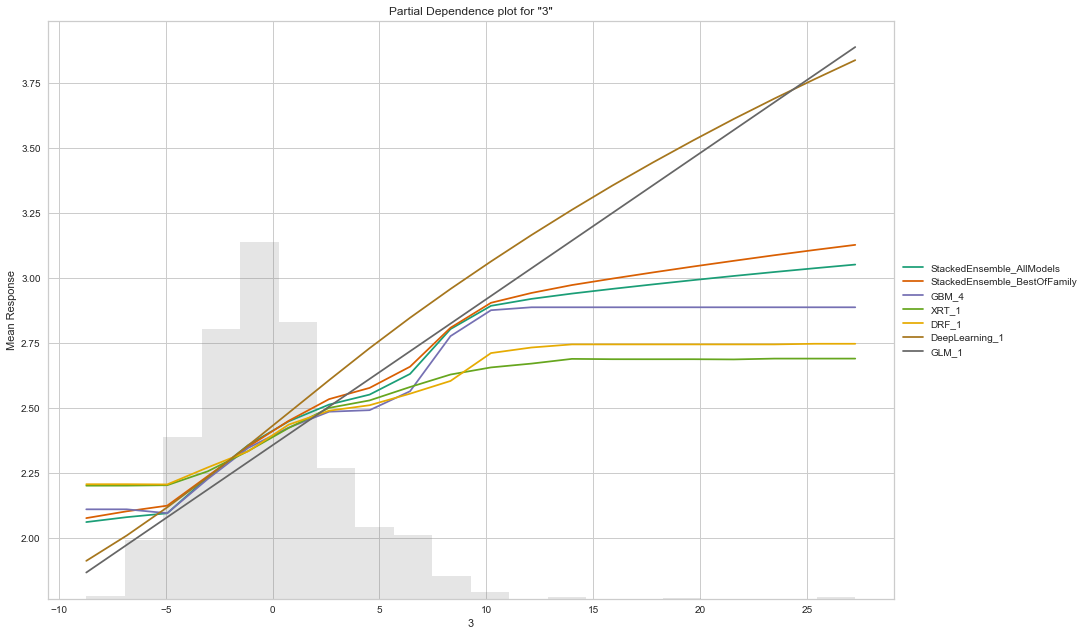

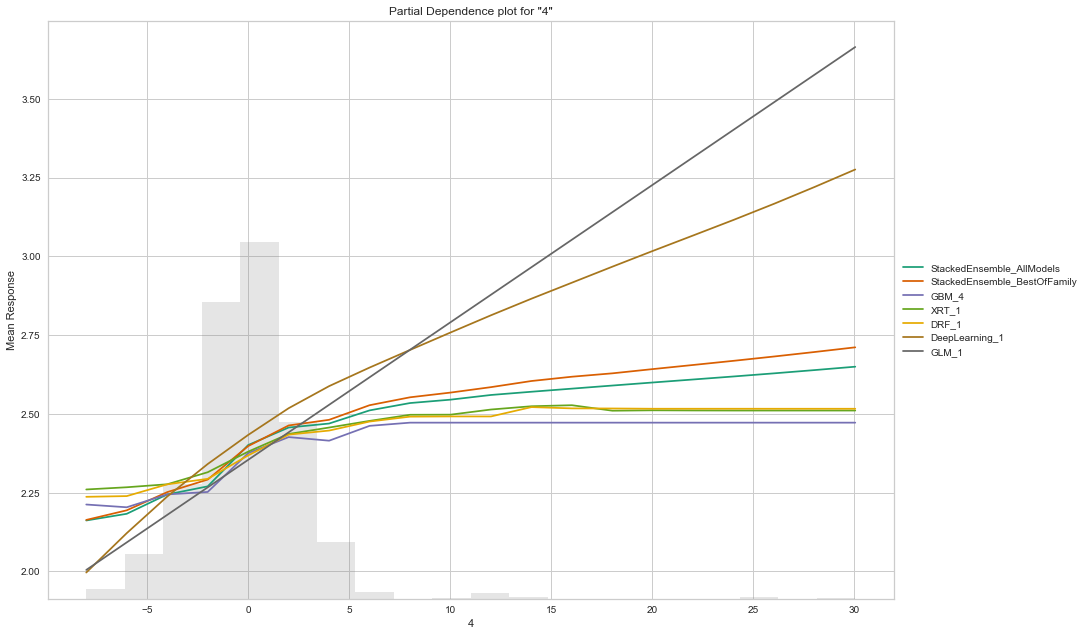

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

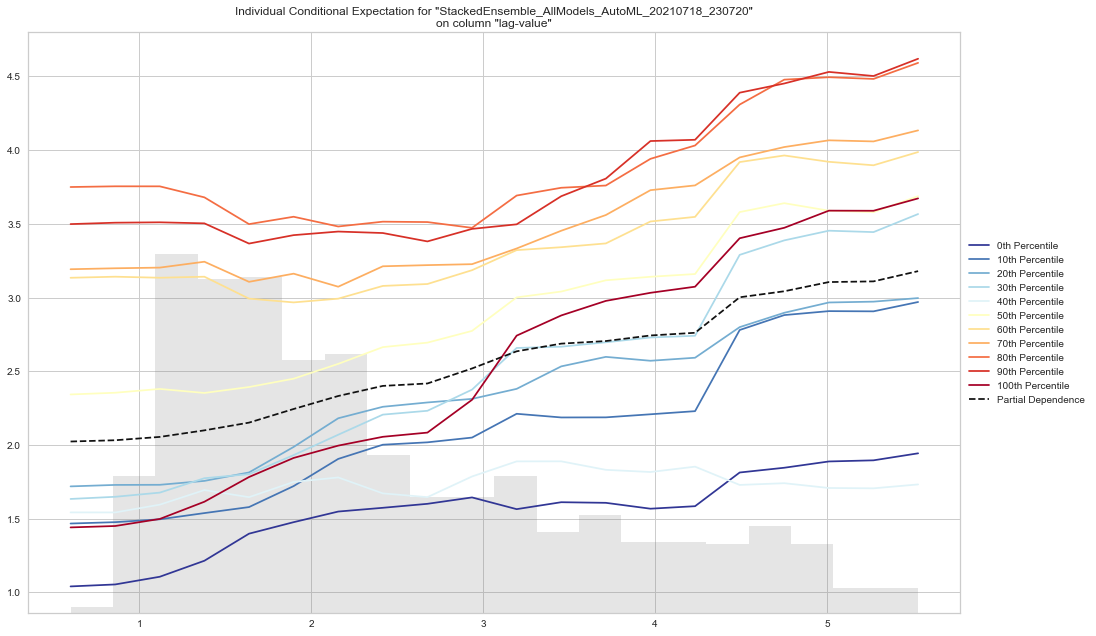

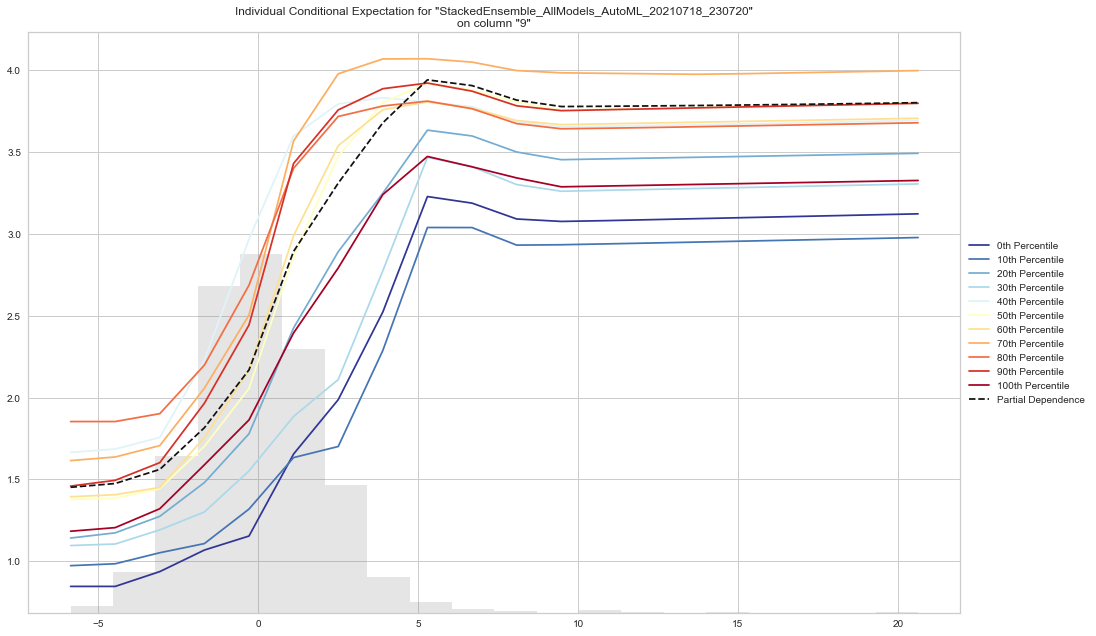

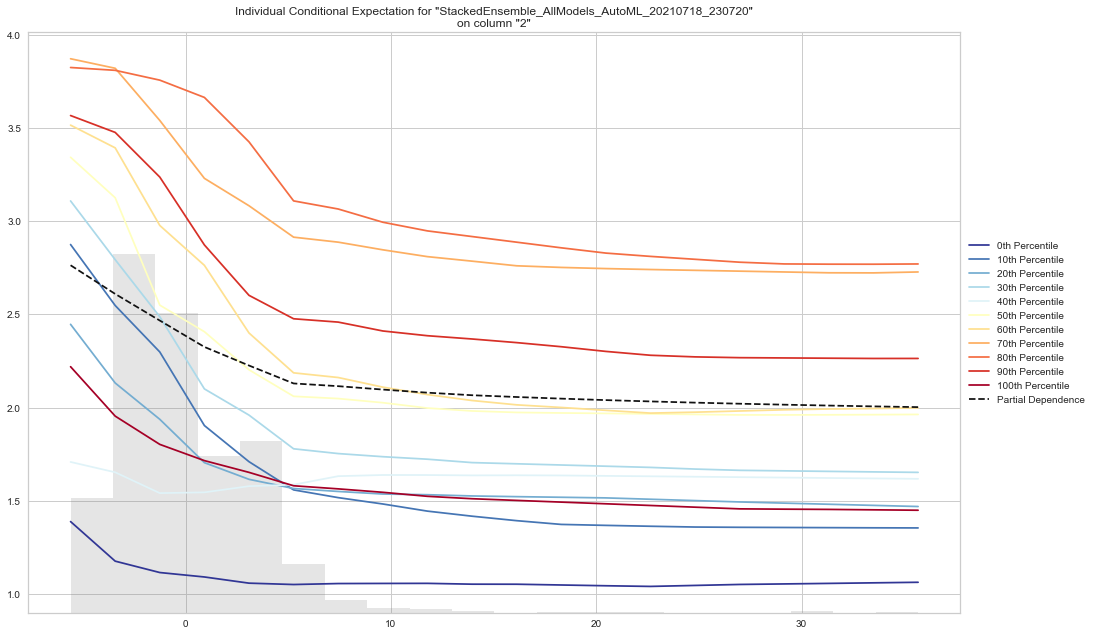

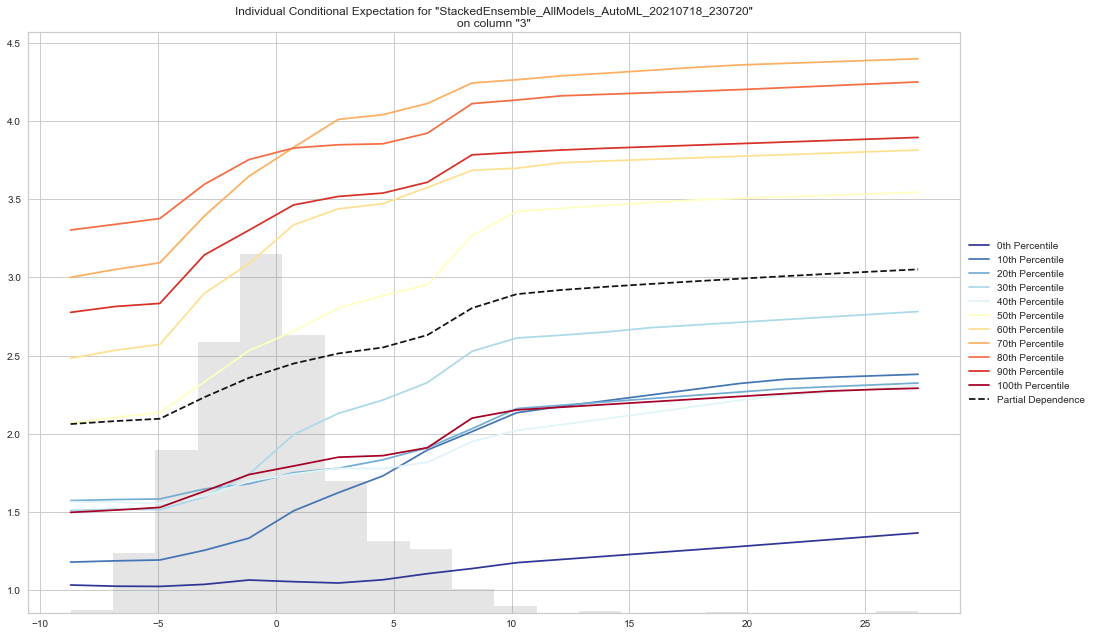

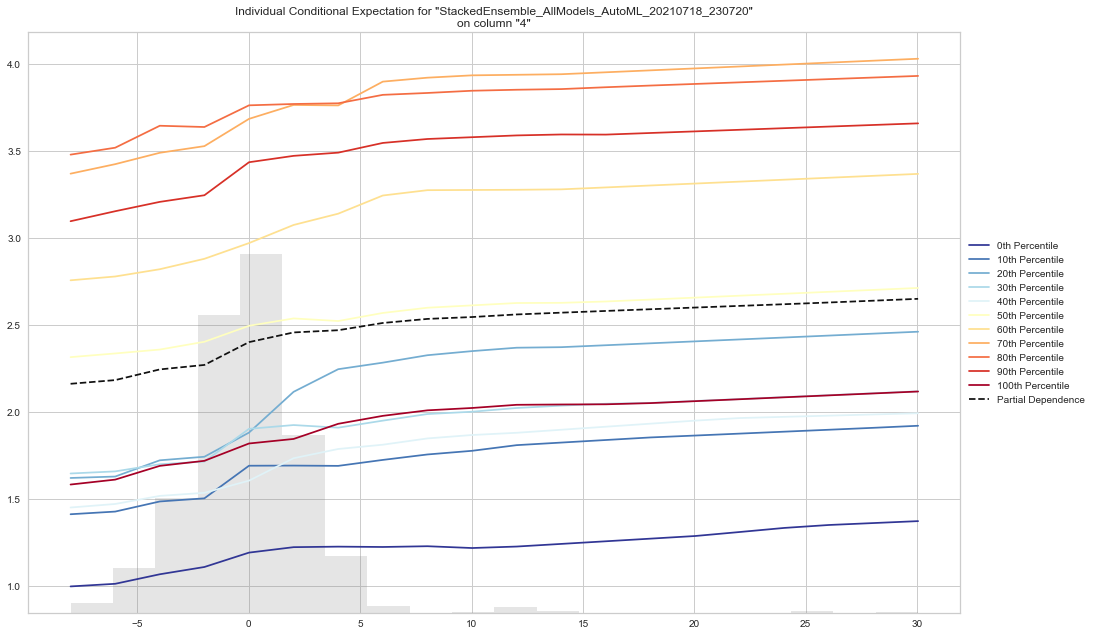

In [106]:
exm = aml.explain(test1)

In [90]:
mlflow.end_run()

9)Lastly we deploy the model using bentoml(make sure that bentoml is installed)

In [96]:
%%writefile flotation_cell.py
import pandas as pd
import bentoml
from bentoml.frameworks.sklearn import SklearnModelArtifact
from bentoml.frameworks.h2o import H2oModelArtifact
from bentoml.service.artifacts.common import PickleArtifact
from bentoml.handlers import DataframeHandler
from bentoml.adapters import DataframeInput

@bentoml.artifacts([H2oModelArtifact('model')])
@bentoml.env(pip_packages=["scikit-learn", "pandas","h2o"],
            conda_channels=['h2oai'],
            conda_dependencies=['h2o'])
class flotation_cell(bentoml.BentoService):

    @bentoml.api(input=DataframeInput(), batch=True)
    def predict(self, df):
        """
        predict expects pandas.Series as input
        """        
#         series = df.iloc[0,:
        hf = h2o.H2OFrame(df)
        return self.artifacts.model.predict(hf).as_data_frame()

Overwriting flotation_cell.py


In [ ]:
# 1) import the custom BentoService defined above
from flotation_cell import flotation_cell

# 2) `pack` it with required artifacts
bento_service = flotation_cell()
bento_service.pack('model', aml.leader)

# 3) save your BentoSerivce to file archive
saved_path = bento_service.save()

In [ ]:
#!bentoml serve flotation_cell:latest --run-with-ngrok

We can see the comparison of all the packages using the following command since we had logged in all the details using mlflow, since the link is not appearing here, we will have to type the command 'mlflow ui' in anaconda prompt to get the link of mlflow.

In [115]:
!jupyter nbconvert --to python Comparison_of_automl.ipynb

[NbConvertApp] Converting notebook Comparison_of_automl.ipynb to python
[NbConvertApp] Writing 15530 bytes to Comparison_of_automl.py
